# Summary

By the end of this notebook we will look at the daily close values of the S&P 500 Index from the date of June 3rd, 2013. After which we will assess the linearity of all time records and apply 3 different types of machine learning models and assess which is the greatest fit for predicting the value of the S&P 500 Index.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
print("Setup Complete")

Setup Complete


In [4]:
#Reading CSV from document file path
sp500_filepath="/Users/school/Documents/GitHub/Portfolio-Projects/Market Indexes Jupyter Notebook/SP500_train.csv"
sp500_data=pd.read_csv(sp500_filepath)
#Preview of Data
sp500_data


,date,open,high,low,close,adj_close,volume
0,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000
...,...,...,...,...,...,...,...
1253,2016-12-23,2260.250000,2263.790039,2258.840088,2263.790039,2263.790039,2020550000
1254,2016-12-27,2266.229980,2273.820068,2266.149902,2268.879883,2268.879883,1987080000
1255,2016-12-28,2270.229980,2271.310059,2249.110107,2249.919922,2249.919922,2392360000
1256,2016-12-29,2249.500000,2254.510010,2244.560059,2249.260010,2249.260010,2336370000


This table can be found at (https://www.kaggle.com/datasets/elvinagammed/sp500-stock-market-index?select=SP500_train.csv). It showcases the daily open, high, low, and close values of the S&P 500 stock market index. It also includes the adjusted and volume traded that day as well.

We also want to convert the dates in the datetime64 object type as it will be easier to handle than as a string or float64 value.

In [6]:
#Parsing date column as datetime64 object type
sp500_data['date'] = sp500_data['date'].astype('datetime64[ns]')
sp500_data.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

# Plotting Data

Plotting the data on a lineplot and applying a regression line to see how it fits with the data. Afterwards calculating the R2 value to quantify the linearity of the data.

PearsonRResult(statistic=0.9405716129554352, pvalue=0.0)


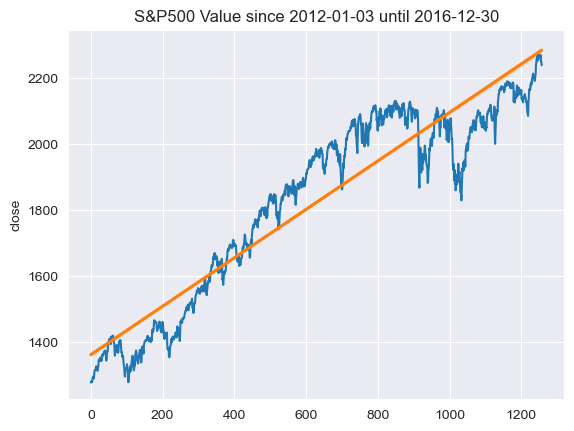

In [57]:
ax = sns.lineplot(data=sp500_data,x=sp500_data.index,y=sp500_data['close']).set_title("S&P500 Value since 2012-01-03 until 2016-12-30")
sns.regplot(data=sp500_data, x=sp500_data.index, y=sp500_data['close'], scatter=False)
r2=sp.stats.pearsonr(x=sp500_data.index,y=sp500_data['close'])
print(r2)

# Applying and training model

First we will be splitting all our data into test and validation data to apply to the model. Afterwards we will train 3 types of models from scikit. 

In [58]:
#Features to chose for model from table
sp_500_features = ['open','high','low','volume']
train_X=sp500_data[sp_500_features]
#Target for model
train_y=sp500_data['close']

The data already used beforehand is all test data, now we will import validation data to test each different model with. This is so we can see just how accurate each model will be.

In [59]:
#Reading CSV from document file path
sp500_filepath_val="/Users/school/Documents/GitHub/Portfolio-Projects/Market Indexes Jupyter Notebook/SP500_test.csv"
sp500_data_val=pd.read_csv(sp500_filepath_val)
#Validation features from table
val_features = ['open','high','low','volume']
val_X=sp500_data_val[val_features]
#Validation target for model
val_y=sp500_data_val['close']
#Preview of Data
sp500_data_val

,date,open,high,low,close,adj_close,volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
5,2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3638790000
6,2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3620410000
7,2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,2270.439941,3462130000
8,2017-01-13,2272.739990,2278.679932,2271.510010,2274.639893,2274.639893,3081270000
9,2017-01-17,2269.139893,2272.080078,2262.810059,2267.889893,2267.889893,3584990000


The first model is the Linear Regression model. It is a fairly basic model and is not expected to have the greatest accuracy. We will be measuring both mean absolute error and R2 for accuracy of the model

In [47]:
sp500_model_linear = LinearRegression()

sp500_model_linear.fit(train_X,train_y)

val_predictions = sp500_model_linear.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
r_sq = sp500_model_linear.score(val_X, val_y)
print('R2 =', r_sq)

3.094836287929115
R2 = 0.8321187028235959


The second model is the Decision Tree Regressor model, this one may or may not be more accurate in terms of mean absolute error and R2 value.

In [48]:
sp500_model_tree = DecisionTreeRegressor(random_state=0)
sp500_model_tree.fit(train_X,train_y)

val_predictions = sp500_model_tree.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
r_sq = sp500_model_tree.score(train_X, train_y)
print('R2 =', r_sq)

8.835046249999982
R2 = 1.0


For the Decision Tree Regressor model, our mean absolute error is worse, however our R2 is at 1 which then indicates the model is completely accurate to the data. The next one we can try is the Random Forest Regressor model.

In [49]:
sp500_model_forest = RandomForestRegressor(random_state=0)
sp500_model_forest.fit(train_X,train_y)

val_predictions = sp500_model_forest.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
r_sq = sp500_model_forest.score(train_X, train_y)
print('R2 =', r_sq)

8.607455085500623
R2 = 0.9999078103938878


The Random Forest Regressor Model shows to be lower in R2 compared to the Decision Tree Regressor model, however it's mean absolute error is also more accurate than said model. However, seems the Linear Regression model is the most accurate if absolute mean error is the measure to go by.